# Analysis of Conditions contributing to COVID-19 Deaths from years 2020-2023


This dataset shows us the total number of people that have died from various reasons from 2020 to 2023 in the United States and its regions. This was the time when COVID-19 started and we are using this dataset to evaluate and analyze the impact of COVID-19 alongside other health conditions in the United States.


##Motivation and Report Summary:
We aim to assess the regions and demographic age groups most susceptible to COVID-19-related mortality, allowing us to strategically allocate our vaccination resources to target these high-risk areas. This is done due to the countless people who suffered from this disease and we aim to help organizations better understand this data to make better public health decisions.


###Data Source:
Center for Disease Control and Prevention.
Link to access the data source is provided below.
https://data.cdc.gov/NCHS/Provisional-COVID-19-Deaths-by-Sex-and-Age/9bhg-hcku


State Population Totals and Components of Change (2020-2022):
https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html

Each row represents a time period (months/years) when deaths occured and tells us whether those deaths were from COVID-19, Influenza, Pneumonia, or any other reason.


* Date As of: Date data was collected
* Start Date: Date data collection for the row started
* End Date: Date Data collection for the row ended
* Group: Data grouped by (Year, Month, Total)
* Year: Year (2020, 2021, 2022, 2023)
* Month
* State
* Age Group
* COVID-19 Deaths
* Total Deaths
* Pneumonia Deaths
* Pneumonia and Covid-19 Deaths
* Influenza Deaths
* Pneumonia, Influenza and COVID-19 Deaths
* Footnotes



####In this project, we are:
* Analyzing the total number of deaths per state in US categorized by year.
* Evaluating and determining the trend of COVID-19, Influenza and Pneumonia deaths against the total number of deaths.
* Determining how COVID-19 deaths are distributed amoung different age groups and which age group is more susceptible to COVID-19 more than others thereby highlighting those in need of special care and attention.
* Comparing the COVID-19 deaths with deaths due to other conditions alongside COVID-19 for each given year.
* Comparing the COVID-19 Deaths by Sex for each year.

####Basic Information
Dataset has
* 16 Columns
* 133700 Rows
We will be using Pandas, NumPy, Matplotlib and Seaborn to make our plots and visualizations to showcase the data.

# Data Preparation
Importing necessary libraries and mounting Colab to Google Drive

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression

In [338]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [339]:
data_path='/content/gdrive/MyDrive/BU-Fall/BA780-Project/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv'

In [340]:
deaths = pd.read_csv(data_path)
deaths.shape

(137700, 16)

In [341]:
deaths.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,All Ages,1145443.0,12243921.0,1159433.0,568733.0,22198.0,1755856.0,NaN
1,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,Under 1 year,519.0,72811.0,1050.0,95.0,64.0,1535.0,NaN
2,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,0-17 years,1695.0,130217.0,2948.0,424.0,509.0,4702.0,NaN
3,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,1-4 years,284.0,14222.0,688.0,66.0,177.0,1074.0,NaN
4,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,5-14 years,509.0,21885.0,815.0,143.0,219.0,1387.0,NaN


In [342]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137700 entries, 0 to 137699
Data columns (total 16 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Data As Of                                137700 non-null  object 
 1   Start Date                                137700 non-null  object 
 2   End Date                                  137700 non-null  object 
 3   Group                                     137700 non-null  object 
 4   Year                                      134946 non-null  float64
 5   Month                                     123930 non-null  float64
 6   State                                     137700 non-null  object 
 7   Sex                                       137700 non-null  object 
 8   Age Group                                 137700 non-null  object 
 9   COVID-19 Deaths                           98356 non-null   float64
 10  Total Deaths        

#1. Data Cleaning
#####Here we clean our data by dropping the 'Footnotes' column as it is surplus to our requirements. We also filter and remove overlapping age groups and fill null values in all deaths columns with zeros. We do this since we cannot drop null values in columns as it would make the data skewed.

We also convert float values to int and add in two new columns that would help with our visualizations.



In [343]:
# Drop the useless 'Footnote' column
deaths.drop('Footnote',axis=1,inplace=True)

In [344]:
# Filter the overlapping age groups
cleaning_1 = deaths[(deaths['Age Group']=='1-4 years')|(deaths['Age Group']=='15-24 years')
|(deaths['Age Group']=='25-34 years')|(deaths['Age Group']=='35-44 years')|(deaths['Age Group']=='45-54 years')
|(deaths['Age Group']=='5-14 years')|(deaths['Age Group']=='55-64 years')|(deaths['Age Group']=='Under 1 year')]

In [345]:
deaths

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,All Ages,1145443.0,12243921.0,1159433.0,568733.0,22198.0,1755856.0
1,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,Under 1 year,519.0,72811.0,1050.0,95.0,64.0,1535.0
2,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,0-17 years,1695.0,130217.0,2948.0,424.0,509.0,4702.0
3,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,1-4 years,284.0,14222.0,688.0,66.0,177.0,1074.0
4,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,5-14 years,509.0,21885.0,815.0,143.0,219.0,1387.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137695,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,50-64 years,NaN,44.0,NaN,NaN,0.0,NaN
137696,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,55-64 years,0.0,38.0,NaN,0.0,0.0,NaN
137697,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,65-74 years,0.0,58.0,NaN,0.0,0.0,NaN
137698,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,75-84 years,NaN,115.0,22.0,NaN,0.0,24.0


In [346]:
# Drop the overlapping age groups
deaths.drop(cleaning_1.index,axis=0,inplace=True)

In [347]:
# Fill the missing values
fill_values = {'COVID-19 Deaths': 0, 'Total Deaths': 0, 'Pneumonia Deaths': 0,
        'Pneumonia and COVID-19 Deaths': 0, 'Influenza Deaths': 0,
        'Pneumonia, Influenza, or COVID-19 Deaths': 0}
deaths.fillna(fill_values, inplace=True)

In [348]:
deaths

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
0,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,All Ages,1145443.0,12243921.0,1159433.0,568733.0,22198.0,1755856.0
2,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,0-17 years,1695.0,130217.0,2948.0,424.0,509.0,4702.0
6,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,18-29 years,7025.0,230187.0,7020.0,3160.0,328.0,11184.0
8,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,30-39 years,19870.0,346229.0,18346.0,9761.0,643.0,29053.0
10,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,40-49 years,46234.0,508822.0,41012.0,24063.0,999.0,64057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137693,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,40-49 years,0.0,0.0,0.0,0.0,0.0,0.0
137695,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,50-64 years,0.0,44.0,0.0,0.0,0.0,0.0
137697,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,65-74 years,0.0,58.0,0.0,0.0,0.0,0.0
137698,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,75-84 years,0.0,115.0,22.0,0.0,0.0,24.0


In [349]:
# Add Pneumonia only and covid only deaths to the list
deaths['Pneumonia Only'] = deaths.apply(lambda column: column['Pneumonia Deaths'] - column['Pneumonia and COVID-19 Deaths'], axis=1)
deaths['Only Covid19 Deaths']= deaths.apply(lambda column: column['COVID-19 Deaths'] - column['Pneumonia and COVID-19 Deaths'], axis=1)
deaths

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Pneumonia Only,Only Covid19 Deaths
0,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,All Ages,1145443.0,12243921.0,1159433.0,568733.0,22198.0,1755856.0,590700.0,576710.0
2,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,0-17 years,1695.0,130217.0,2948.0,424.0,509.0,4702.0,2524.0,1271.0
6,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,18-29 years,7025.0,230187.0,7020.0,3160.0,328.0,11184.0,3860.0,3865.0
8,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,30-39 years,19870.0,346229.0,18346.0,9761.0,643.0,29053.0,8585.0,10109.0
10,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,40-49 years,46234.0,508822.0,41012.0,24063.0,999.0,64057.0,16949.0,22171.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137693,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,40-49 years,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
137695,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,50-64 years,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0
137697,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,65-74 years,0.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0
137698,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,75-84 years,0.0,115.0,22.0,0.0,0.0,24.0,22.0,0.0


In [350]:
# Convert the death values to integers
deaths['COVID-19 Deaths'] = deaths['COVID-19 Deaths'].astype(int)
deaths['Total Deaths'] = deaths['Total Deaths'].astype(int)
deaths['Pneumonia Deaths'] = deaths['Pneumonia Deaths'].astype(int)
deaths['Pneumonia and COVID-19 Deaths'] = deaths['Pneumonia and COVID-19 Deaths'].astype(int)
deaths['Influenza Deaths'] = deaths['Influenza Deaths'].astype(int)
deaths['Pneumonia, Influenza, or COVID-19 Deaths'] = deaths['Pneumonia, Influenza, or COVID-19 Deaths'].astype(int)
deaths['Pneumonia Only'] = deaths['Pneumonia Only'].astype(int)
deaths['Only Covid19 Deaths'] = deaths['Only Covid19 Deaths'].astype(int)
deaths

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Pneumonia Only,Only Covid19 Deaths
0,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,All Ages,1145443,12243921,1159433,568733,22198,1755856,590700,576710
2,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,0-17 years,1695,130217,2948,424,509,4702,2524,1271
6,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,18-29 years,7025,230187,7020,3160,328,11184,3860,3865
8,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,30-39 years,19870,346229,18346,9761,643,29053,8585,10109
10,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,40-49 years,46234,508822,41012,24063,999,64057,16949,22171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137693,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,40-49 years,0,0,0,0,0,0,0,0
137695,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,50-64 years,0,44,0,0,0,0,0,0
137697,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,65-74 years,0,58,0,0,0,0,0,0
137698,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,75-84 years,0,115,22,0,0,24,22,0


#2. Visualizations



## Question 1: Is there a different ratio of males and females who died from COVID-19?


#### Bar Chart showing male deaths and comparing them with female deaths
Here we are showing the trend of total COVID-19 deaths per year based on sex. This visualizes the deaths of male population and compares it to the deaths with the female population.


In [352]:
# Creating a dataset showing deaths per year for total population of United States
deaths_per_year = deaths[(deaths['State'] == "United States") & (deaths['Group'] == "By Year") & (deaths["Age Group"] == "All Ages")]
deaths_per_year

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Pneumonia Only,Only Covid19 Deaths
2754,9/20/23,1/1/20,12/31/20,By Year,2020.0,NaN,United States,All Sexes,All Ages,385666,3390039,352010,180086,8787,565226,171924,205580
2771,9/20/23,1/1/20,12/31/20,By Year,2020.0,NaN,United States,Male,All Ages,209481,1774408,195512,103323,4545,305504,92189,106158
2788,9/20/23,1/1/20,12/31/20,By Year,2020.0,NaN,United States,Female,All Ages,176185,1615631,156498,76763,4242,259722,79735,99422
2805,9/20/23,1/1/21,12/31/21,By Year,2021.0,NaN,United States,All Sexes,All Ages,463263,3471767,412006,259613,1092,616475,152393,203650
2822,9/20/23,1/1/21,12/31/21,By Year,2021.0,NaN,United States,Male,All Ages,260210,1843487,232698,149565,555,343749,83133,110645
2839,9/20/23,1/1/21,12/31/21,By Year,2021.0,NaN,United States,Female,All Ages,203053,1628280,179308,110048,537,272726,69260,93005
2856,9/20/23,1/1/22,12/31/22,By Year,2022.0,NaN,United States,All Sexes,All Ages,246161,3288942,267652,110393,8751,411412,157259,135768
2873,9/20/23,1/1/22,12/31/22,By Year,2022.0,NaN,United States,Male,All Ages,133452,1725909,147005,62742,4065,221400,84263,70710
2890,9/20/23,1/1/22,12/31/22,By Year,2022.0,NaN,United States,Female,All Ages,112709,1563033,120647,47651,4686,190012,72996,65058
2907,9/20/23,1/1/23,9/16/23,By Year,2023.0,NaN,United States,All Sexes,All Ages,50353,2093173,127765,18641,3568,162743,109124,31712


In [353]:
# Dropping extra values
deaths_per_year.drop(['Month', 'Total Deaths', 'Pneumonia Deaths', 'Pneumonia and COVID-19 Deaths', 'Influenza Deaths', 'Pneumonia, Influenza, or COVID-19 Deaths'], axis=1)

,Data As Of,Start Date,End Date,Group,Year,State,Sex,Age Group,COVID-19 Deaths,Pneumonia Only,Only Covid19 Deaths
2754,9/20/23,1/1/20,12/31/20,By Year,2020.0,United States,All Sexes,All Ages,385666,171924,205580
2771,9/20/23,1/1/20,12/31/20,By Year,2020.0,United States,Male,All Ages,209481,92189,106158
2788,9/20/23,1/1/20,12/31/20,By Year,2020.0,United States,Female,All Ages,176185,79735,99422
2805,9/20/23,1/1/21,12/31/21,By Year,2021.0,United States,All Sexes,All Ages,463263,152393,203650
2822,9/20/23,1/1/21,12/31/21,By Year,2021.0,United States,Male,All Ages,260210,83133,110645
2839,9/20/23,1/1/21,12/31/21,By Year,2021.0,United States,Female,All Ages,203053,69260,93005
2856,9/20/23,1/1/22,12/31/22,By Year,2022.0,United States,All Sexes,All Ages,246161,157259,135768
2873,9/20/23,1/1/22,12/31/22,By Year,2022.0,United States,Male,All Ages,133452,84263,70710
2890,9/20/23,1/1/22,12/31/22,By Year,2022.0,United States,Female,All Ages,112709,72996,65058
2907,9/20/23,1/1/23,9/16/23,By Year,2023.0,United States,All Sexes,All Ages,50353,109124,31712


In [354]:
# Converting to correct datatype
deaths_per_year['Year'] = deaths_per_year['Year'].astype(int)

<ipython-input-354-d2f3011109f4>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [355]:
deaths_per_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 2754 to 2941
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Data As Of                                12 non-null     object 
 1   Start Date                                12 non-null     object 
 2   End Date                                  12 non-null     object 
 3   Group                                     12 non-null     object 
 4   Year                                      12 non-null     int64  
 5   Month                                     0 non-null      float64
 6   State                                     12 non-null     object 
 7   Sex                                       12 non-null     object 
 8   Age Group                                 12 non-null     object 
 9   COVID-19 Deaths                           12 non-null     int64  
 10  Total Deaths                       

In [356]:
deaths_per_year

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Pneumonia Only,Only Covid19 Deaths
2754,9/20/23,1/1/20,12/31/20,By Year,2020,NaN,United States,All Sexes,All Ages,385666,3390039,352010,180086,8787,565226,171924,205580
2771,9/20/23,1/1/20,12/31/20,By Year,2020,NaN,United States,Male,All Ages,209481,1774408,195512,103323,4545,305504,92189,106158
2788,9/20/23,1/1/20,12/31/20,By Year,2020,NaN,United States,Female,All Ages,176185,1615631,156498,76763,4242,259722,79735,99422
2805,9/20/23,1/1/21,12/31/21,By Year,2021,NaN,United States,All Sexes,All Ages,463263,3471767,412006,259613,1092,616475,152393,203650
2822,9/20/23,1/1/21,12/31/21,By Year,2021,NaN,United States,Male,All Ages,260210,1843487,232698,149565,555,343749,83133,110645
2839,9/20/23,1/1/21,12/31/21,By Year,2021,NaN,United States,Female,All Ages,203053,1628280,179308,110048,537,272726,69260,93005
2856,9/20/23,1/1/22,12/31/22,By Year,2022,NaN,United States,All Sexes,All Ages,246161,3288942,267652,110393,8751,411412,157259,135768
2873,9/20/23,1/1/22,12/31/22,By Year,2022,NaN,United States,Male,All Ages,133452,1725909,147005,62742,4065,221400,84263,70710
2890,9/20/23,1/1/22,12/31/22,By Year,2022,NaN,United States,Female,All Ages,112709,1563033,120647,47651,4686,190012,72996,65058
2907,9/20/23,1/1/23,9/16/23,By Year,2023,NaN,United States,All Sexes,All Ages,50353,2093173,127765,18641,3568,162743,109124,31712


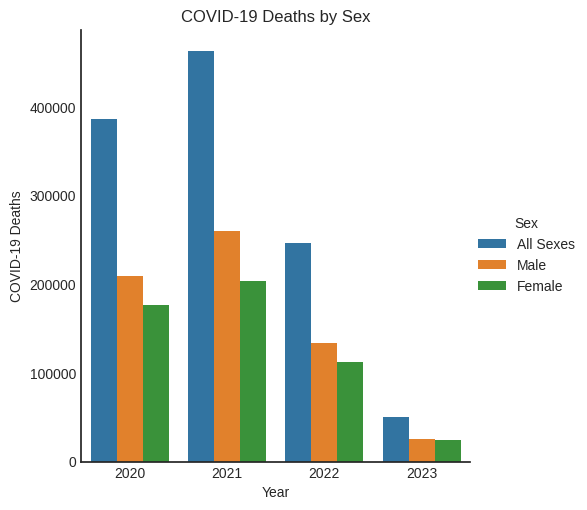

In [357]:
# Plotting the graph of COVID-19 deaths for male and female
sns.catplot(y = 'COVID-19 Deaths', x = 'Year', hue="Sex", data=deaths_per_year, kind='bar').set(title="COVID-19 Deaths by Sex")
plt.show()

####  Summary:
Here we are showing the trend of COVID-19 deaths for all 4 years as well as total deaths for all four years. This shows us that there were more male deaths than female deaths and that the overall trend decreased for each year. This could be due to increased vaccinations or better immunity.


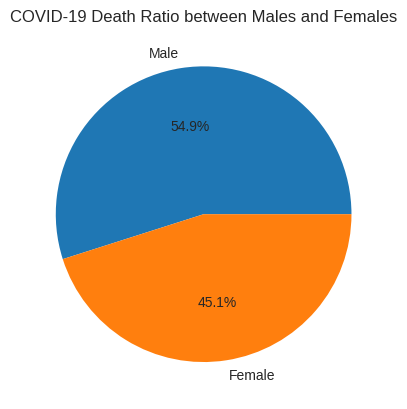

In [358]:
# Pie chart of death ratio of male vs female
deaths_per_year1 = deaths[(deaths['State'] == "United States") & (deaths['Group'] == "By Total") & (deaths["Age Group"] == "All Ages")
& (deaths['Sex']!='All Sexes')]
deaths_per_year1

plt.pie(deaths_per_year1['COVID-19 Deaths'],labels=deaths_per_year1['Sex'],autopct='%1.1f%%')
plt.title('COVID-19 Death Ratio between Males and Females')
plt.show()


##### Summary:
This chart shows us that 54.9% of people died to due to COVID-19 whereas 45.1% of people that died were women. The higher percentage of men that died could be due to them working and being breadwinners and therefore have to interact with more people over the course of their day-to-day activities.

#### Bar Graph of Death count for different diseases

In [359]:
deaths_per_year["Sex"]
deaths_sex = deaths_per_year[deaths_per_year["Sex"] != 'All Sexes']
deaths_sex

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Pneumonia Only,Only Covid19 Deaths
2771,9/20/23,1/1/20,12/31/20,By Year,2020,NaN,United States,Male,All Ages,209481,1774408,195512,103323,4545,305504,92189,106158
2788,9/20/23,1/1/20,12/31/20,By Year,2020,NaN,United States,Female,All Ages,176185,1615631,156498,76763,4242,259722,79735,99422
2822,9/20/23,1/1/21,12/31/21,By Year,2021,NaN,United States,Male,All Ages,260210,1843487,232698,149565,555,343749,83133,110645
2839,9/20/23,1/1/21,12/31/21,By Year,2021,NaN,United States,Female,All Ages,203053,1628280,179308,110048,537,272726,69260,93005
2873,9/20/23,1/1/22,12/31/22,By Year,2022,NaN,United States,Male,All Ages,133452,1725909,147005,62742,4065,221400,84263,70710
2890,9/20/23,1/1/22,12/31/22,By Year,2022,NaN,United States,Female,All Ages,112709,1563033,120647,47651,4686,190012,72996,65058
2924,9/20/23,1/1/23,9/16/23,By Year,2023,NaN,United States,Male,All Ages,25880,1093898,68428,10244,1663,85583,58184,15636
2941,9/20/23,1/1/23,9/16/23,By Year,2023,NaN,United States,Female,All Ages,24473,999275,59337,8397,1905,77160,50940,16076


<Axes: title={'center': 'Influenza Deaths by Sex'}, xlabel='Year', ylabel='Influenza Deaths'>

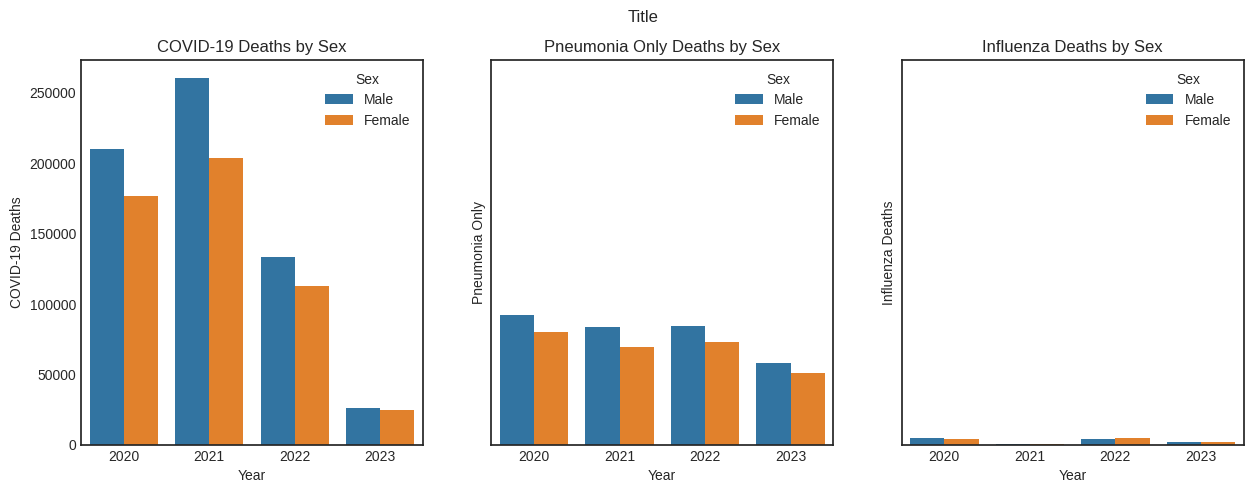

In [360]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
axes[0].set_title("COVID-19 Deaths by Sex")
axes[1].set_title("Pneumonia Only Deaths by Sex")
axes[2].set_title("Influenza Deaths by Sex")
fig.suptitle("Title")

sns.barplot(ax = axes[0], y = 'COVID-19 Deaths', x = 'Year', hue="Sex", data=deaths_sex)
sns.barplot(ax = axes[1], y = 'Pneumonia Only', x = 'Year', hue="Sex", data=deaths_sex)
sns.barplot(ax = axes[2], y = 'Influenza Deaths', x = 'Year', hue="Sex", data=deaths_sex)
# plt.show()

##### Summary:
This visualization shows subplots of deaths of population due to various health reasons for both male and female from 2020-2023.

Subplot 1 shows the deaths due to COVID-19.

Subplot 2 shows the deaths due to Pneumonia.

Subplot 3 shows the deaths due to Influenza

## Question 2: What is the trend of people who died of COVID-19 over the total time period and how does that impacts the overall death trend?



####Line Chart showing trend of COVID-19 Deaths and total deaths

In [361]:
# Construct a DataFrame that exclusively includes the columns required for the line chart
line_2 = deaths[['Group','Year','Month','State','Sex','Age Group','COVID-19 Deaths','Total Deaths']]
line_2

,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths
0,By Total,NaN,NaN,United States,All Sexes,All Ages,1145443,12243921
2,By Total,NaN,NaN,United States,All Sexes,0-17 years,1695,130217
6,By Total,NaN,NaN,United States,All Sexes,18-29 years,7025,230187
8,By Total,NaN,NaN,United States,All Sexes,30-39 years,19870,346229
10,By Total,NaN,NaN,United States,All Sexes,40-49 years,46234,508822
...,...,...,...,...,...,...,...,...
137693,By Month,2023.0,9.0,Puerto Rico,Female,40-49 years,0,0
137695,By Month,2023.0,9.0,Puerto Rico,Female,50-64 years,0,44
137697,By Month,2023.0,9.0,Puerto Rico,Female,65-74 years,0,58
137698,By Month,2023.0,9.0,Puerto Rico,Female,75-84 years,0,115


In [362]:
# Filter to get the rows required for the line chart
line_2 = line_2[(line_2['Group']=='By Month') & (line_2['State']=='United States') &
                (line_2['Sex']=='All Sexes') & (line_2['Age Group']=='All Ages')]
line_2

,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths
13770,By Month,2020.0,1.0,United States,All Sexes,All Ages,6,264677
13821,By Month,2020.0,2.0,United States,All Sexes,All Ages,25,244951
13872,By Month,2020.0,3.0,United States,All Sexes,All Ages,7174,269807
13923,By Month,2020.0,4.0,United States,All Sexes,All Ages,65550,322414
13974,By Month,2020.0,5.0,United States,All Sexes,All Ages,38329,280562
14025,By Month,2020.0,6.0,United States,All Sexes,All Ages,18026,250441
14076,By Month,2020.0,7.0,United States,All Sexes,All Ages,31135,279008
14127,By Month,2020.0,8.0,United States,All Sexes,All Ages,29911,277288
14178,By Month,2020.0,9.0,United States,All Sexes,All Ages,19158,257191
14229,By Month,2020.0,10.0,United States,All Sexes,All Ages,24930,273912


In [363]:
# Construct DataFrames of 'COVID-19 Deaths', 'Total Deaths' and 'Non-COVID Deaths'
covid_deaths = line_2[['Year','Month','COVID-19 Deaths']]
total_deaths = line_2[['Year','Month','Total Deaths']]
non_covid = line_2['Total Deaths'] - line_2['COVID-19 Deaths']
line_2['non_covid'] = non_covid
non_covid_deaths = line_2[['Year','Month','non_covid']]
non_covid_deaths

<ipython-input-363-86c8073001e1>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month,non_covid
13770,2020.0,1.0,264671
13821,2020.0,2.0,244926
13872,2020.0,3.0,262633
13923,2020.0,4.0,256864
13974,2020.0,5.0,242233
14025,2020.0,6.0,232415
14076,2020.0,7.0,247873
14127,2020.0,8.0,247377
14178,2020.0,9.0,238033
14229,2020.0,10.0,248982


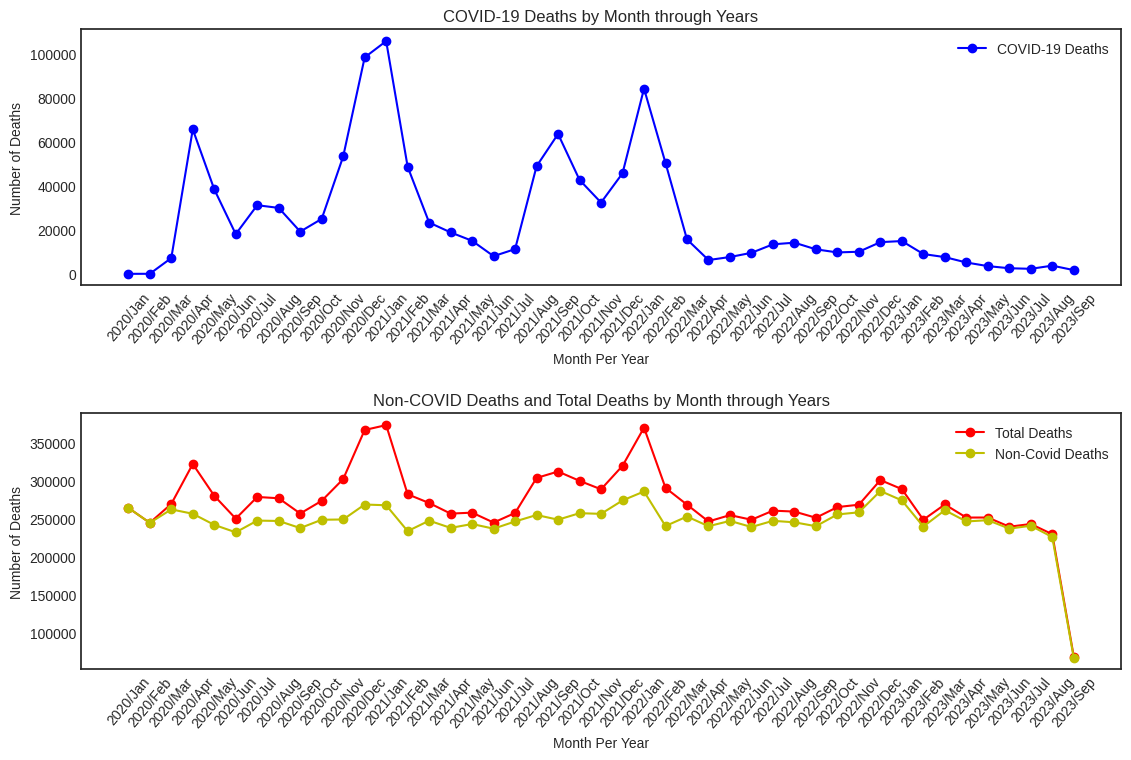

In [364]:
# Create canvas
fig, axs = plt.subplots(2,1,figsize=(13,8))

# Create labels for x-axis
years = ['2020','2021','2022','2023']
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
lst = []

for i in range(len(years)):
  for j in range(len(month_labels)):
    lst.append(years[i]+'/'+month_labels[j])

new_lst = lst[:-3]

# Create a line chart for COVID-19 Deaths
axs[0].plot(range(45),covid_deaths['COVID-19 Deaths'],'-b',label='COVID-19 Deaths',marker='o')
axs[0].set_xticks(range(45))
axs[0].set_xticklabels(new_lst,rotation=50)
axs[0].set_title('COVID-19 Deaths by Month through Years')
axs[0].set_xlabel('Month Per Year')
axs[0].set_ylabel('Number of Deaths')
axs[0].legend()

# Create a line chart for total deaths
axs[1].plot(range(45),total_deaths['Total Deaths'],'-r',label='Total Deaths',marker='o')
axs[1].plot(range(45),non_covid_deaths['non_covid'],'-y',label='Non-Covid Deaths',marker='o')
axs[1].set_xticks(range(45))
axs[1].set_xticklabels(new_lst,rotation=50)
axs[1].set_title('Non-COVID Deaths and Total Deaths by Month through Years')
axs[1].set_xlabel('Month Per Year')
axs[1].set_ylabel('Number of Deaths')
axs[1].legend()

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.5)
plt.show()

##### Summary:
Comparing the two graphs above, we can observe that 'total deaths' exhibits similar trends to 'COVID-19 deaths' or 'Non-COVID deaths' at different time points. From December 2020 to January 2021, non-COVID deaths increased compared to previous months, although the change was not very significant. However, COVID-19 deaths and total deaths both reached their peaks. Furthermore, starting from April 2022, the trend and counts of total deaths closely resembled those of non-COVID deaths, but showed a significant difference from COVID-19 deaths. Therefore, we speculated that COVID-19 deaths and non-COVID deaths both have a certain degree of influence on total deaths, and we later confirmed our hypothesis.

#### Regression Model, showing the correlation between COVID-19 deaths and total death count, as well as COVID-19 and Non-COVID-19 deaths

In [365]:
# Select hyperparameter for the linear regression model of COVID-19 deaths and total deaths
model_1 = LinearRegression(fit_intercept=True)

# Select hyperparameter for the linear regression model of non-COVID deaths and total deaths
model_2 = LinearRegression(fit_intercept=True)

In [366]:
# Prepare X and y for the linear regression model of COVID-19 deaths and total deaths
print(line_2[['COVID-19 Deaths']].shape)
print(line_2[['Total Deaths']].shape)
X_1 = line_2[['COVID-19 Deaths']]
y_1 = line_2[['Total Deaths']]

# Prepare X and y for the linear regression model of non-COVID deaths and total deaths
print(line_2[['non_covid']].shape)
print(line_2[['Total Deaths']].shape)
X_2 = line_2[['non_covid']]
y_2 = line_2[['Total Deaths']]

(45, 1)
(45, 1)
(45, 1)
(45, 1)


In [367]:
# Fit the models to the data
model_1.fit(X_1, y_1)

model_2.fit(X_2, y_2)

LinearRegression()

In [368]:
# Check the coeficients of both models
print(model_1.coef_)
print(model_2.coef_)

[[1.35194318]]
[[1.25723687]]


In [369]:
# Check the intercepts of both models
print(model_1.intercept_)
print(model_2.intercept_)

[237674.38112862]
[-37988.77273979]


In [370]:
# Predict labels for unknown data for model 1
xfit_1 = np.linspace(0,120000)
xfit_1 = pd.DataFrame(xfit_1)
print(xfit_1.shape)

# Predict labels for unknown data for model 2
xfit_2 = np.linspace(200000,300000)
xfit_2 = pd.DataFrame(xfit_2)
print(xfit_2.shape)

(50, 1)
(50, 1)


In [371]:
# Make predictions
yfit_1 = model_1.predict(xfit_1)
yfit_2 = model_2.predict(xfit_2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



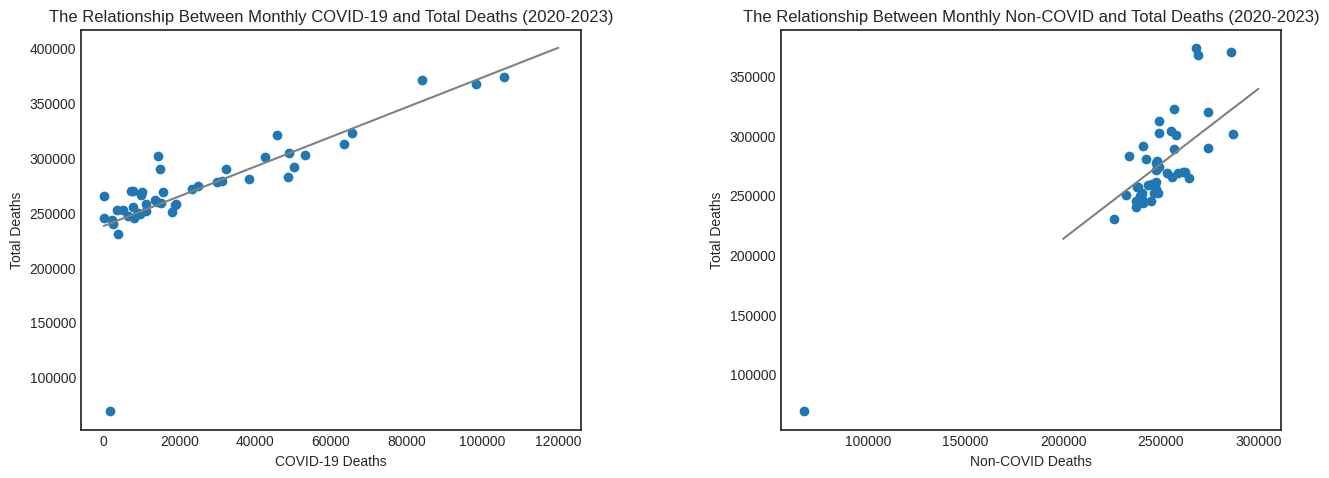

In [372]:
# Create canvas
fig_1, axs_1 = plt.subplots(1, 2, figsize=(15, 5))

# Make a scatterplot for the raw data of COVID-19 deaths and total deaths and add the model fit
axs_1[0].scatter(line_2['COVID-19 Deaths'],line_2['Total Deaths'])
axs_1[0].plot(xfit_1,yfit_1,c='gray')
axs_1[0].set_title('The Relationship Between Monthly COVID-19 and Total Deaths (2020-2023)')
axs_1[0].set_xlabel('COVID-19 Deaths')
axs_1[0].set_ylabel('Total Deaths')

# Make a scatterplot for the raw data of non-COVID deaths and total deaths and add the model fit
axs_1[1].scatter(line_2['non_covid'],line_2['Total Deaths'])
axs_1[1].plot(xfit_2,yfit_2,c='gray')
axs_1[1].set_title('The Relationship Between Monthly Non-COVID and Total Deaths (2020-2023)')
axs_1[1].set_xlabel('Non-COVID Deaths')
axs_1[1].set_ylabel('Total Deaths')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.5)
plt.show()

##### Summary:
To determine whether the desired relationship exists between COVID-19 deaths and total deaths, as well as between non-COVID deaths and total deaths, we created scatterplots for each of these two pairs. After observation, we were inclined to explore the construction of linear regression models using the raw data from these two subsets. We obtained the model fits as shown in the graphs and found that the expected linear relationships hold. Therefore, we can conclude that both COVID-19 deaths and non-COVID deaths have an impact on total deaths. This explains the observed converging trends in the line charts above.

## Question 3: Are there any difference of trends in COVID-19 deaths between Massechussettes, Illinois, New Jersey, California, Texas, Florida?


#### Line Chart showing death trend for these specific states.

In [422]:
compare=deaths[['Group','Year','Month','State','COVID-19 Deaths','Sex','Age Group']]
compare=compare.loc[(compare['Group']== 'By Month') & (compare['Sex'] == 'All Sexes') & (compare['Age Group'] == 'All Ages') & (compare['State'] != 'United States' ) & (compare['State'] != 'Puerto Rico' )].reset_index(drop=True)
compare.head()

,Group,Year,Month,State,COVID-19 Deaths,Sex,Age Group
0,By Month,2020.0,1.0,Alabama,0,All Sexes,All Ages
1,By Month,2020.0,2.0,Alabama,0,All Sexes,All Ages
2,By Month,2020.0,3.0,Alabama,48,All Sexes,All Ages
3,By Month,2020.0,4.0,Alabama,339,All Sexes,All Ages
4,By Month,2020.0,5.0,Alabama,430,All Sexes,All Ages


In [423]:
compare_New_Jersey=compare.loc[compare['State']=='New Jersey']
compare_Massachusetts=compare.loc[compare['State']=='Massachusetts']
compare_California=compare.loc[compare['State']=='California']
compare_Texas=compare.loc[compare['State']=='Texas']
compare_Florida=compare.loc[compare['State']=='Florida']
compare_Illinois=compare.loc[compare['State']=='Illinois']


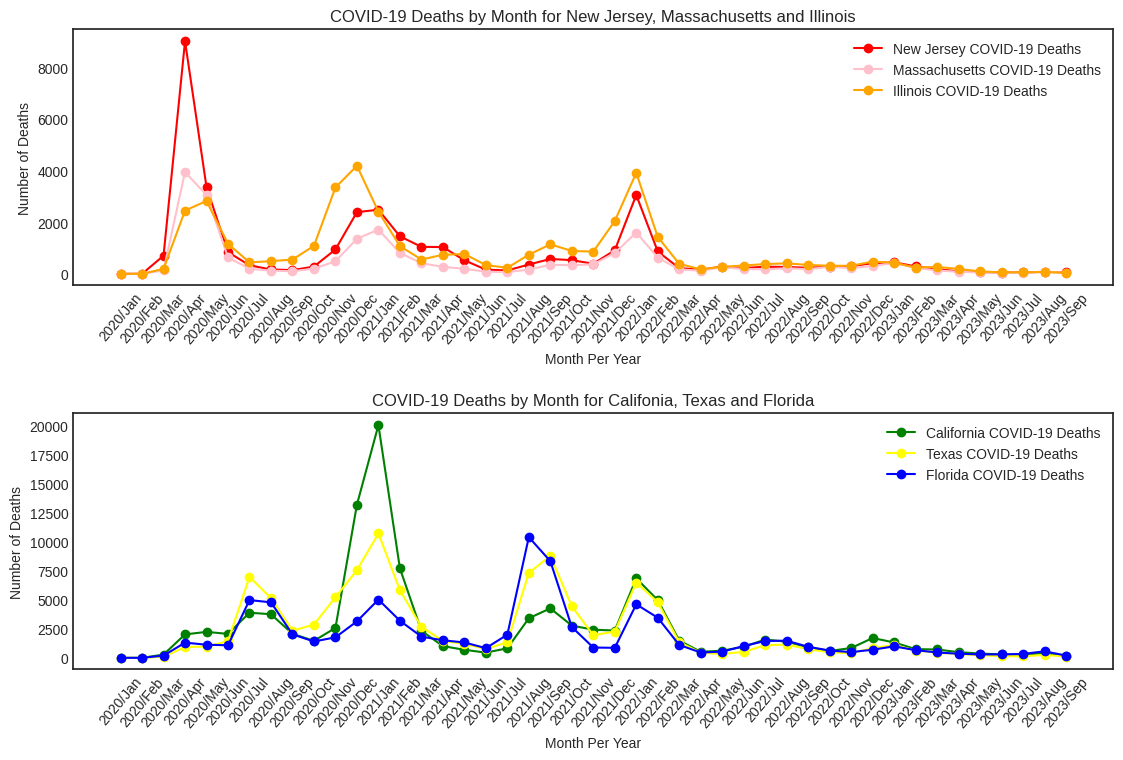

In [424]:
# Create canvas
fig, axs = plt.subplots(2,1,figsize=(13,8))

# Create labels for x-axis
years = ['2020','2021','2022','2023']
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
lst = []

for i in range(len(years)):
  for j in range(len(month_labels)):
    lst.append(years[i]+'/'+month_labels[j])

new_lst = lst[:-3]

# Create a line chart for COVID-19 Deaths
axs[0].plot(range(45),compare_New_Jersey['COVID-19 Deaths'],'red',label='New Jersey COVID-19 Deaths',marker='o')
axs[0].plot(range(45),compare_Massachusetts['COVID-19 Deaths'],'pink',label='Massachusetts COVID-19 Deaths',marker='o')
axs[0].plot(range(45),compare_Illinois['COVID-19 Deaths'],'orange',label='Illinois COVID-19 Deaths',marker='o')
axs[0].set_xticks(range(45))
axs[0].set_xticklabels(new_lst,rotation=50)
axs[0].set_title('COVID-19 Deaths by Month for New Jersey, Massachusetts and Illinois')
axs[0].set_xlabel('Month Per Year')
axs[0].set_ylabel('Number of Deaths')
axs[0].legend()

# Create a line chart for total deaths
axs[1].plot(range(45),compare_California['COVID-19 Deaths'],'green',label='California COVID-19 Deaths',marker='o')
axs[1].plot(range(45),compare_Texas['COVID-19 Deaths'],'yellow',label='Texas COVID-19 Deaths',marker='o')
axs[1].plot(range(45),compare_Florida['COVID-19 Deaths'],'blue',label='Florida COVID-19 Deaths',marker='o')
axs[1].set_xticks(range(45))
axs[1].set_xticklabels(new_lst,rotation=50)
axs[1].set_title('COVID-19 Deaths by Month for Califonia, Texas and Florida')
axs[1].set_xlabel('Month Per Year')
axs[1].set_ylabel('Number of Deaths')
axs[1].legend()

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.5)
plt.show()

##### Summary:
From the line chart we can observe that different states have different death peaks. For New Jersey, Massachusetts and Illinois, the peak appears in March 2020, December 2020, December 2021; for California, Texas and Florida, the peak appears in June 2020, December 2020, August 2021 and January 2022.

## Question 4: Which age group is more susceptible to death by COVID-19?


####Stacked Bar chart showing percentage of deaths for each age group

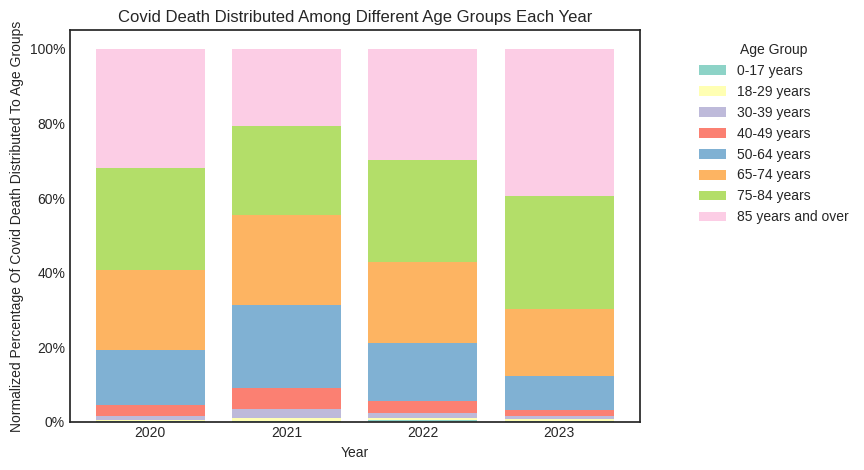

In [376]:
deaths_ages = deaths[(deaths['Group']=='By Year') & (deaths['Age Group']!='All Ages') &
                     (deaths['Sex']=='All Sexes') & (deaths['State']=='United States')][['Year','Age Group','COVID-19 Deaths']]
years = deaths_ages['Year'].unique()
group1 = deaths_ages[deaths_ages['Age Group']=='0-17 years']['COVID-19 Deaths'].reset_index(drop=True)
group2 = deaths_ages[deaths_ages['Age Group']=='18-29 years']['COVID-19 Deaths'].reset_index(drop=True)
group3 = deaths_ages[deaths_ages['Age Group']=='30-39 years']['COVID-19 Deaths'].reset_index(drop=True)
group4 = deaths_ages[deaths_ages['Age Group']=='40-49 years']['COVID-19 Deaths'].reset_index(drop=True)
group5 = deaths_ages[deaths_ages['Age Group']=='50-64 years']['COVID-19 Deaths'].reset_index(drop=True)
group6 = deaths_ages[deaths_ages['Age Group']=='65-74 years']['COVID-19 Deaths'].reset_index(drop=True)
group7 = deaths_ages[deaths_ages['Age Group']=='75-84 years']['COVID-19 Deaths'].reset_index(drop=True)
group8 = deaths_ages[deaths_ages['Age Group']=='85 years and over']['COVID-19 Deaths'].reset_index(drop=True)
total = [group1[i] + group2[i] + group3[i] + group4[i] + group5[i] + group6[i] + group7[i] + group8[i] for i in range(len(years))]
group1_p = np.array([group1[i] / total[i] for i in range(len(years))])
group2_p = np.array([group2[i] / total[i] for i in range(len(years))])
group3_p = np.array([group3[i] / total[i] for i in range(len(years))])
group4_p = np.array([group4[i] / total[i] for i in range(len(years))])
group5_p = np.array([group5[i] / total[i] for i in range(len(years))])
group6_p = np.array([group6[i] / total[i] for i in range(len(years))])
group7_p = np.array([group7[i] / total[i] for i in range(len(years))])
group8_p = np.array([group8[i] / total[i] for i in range(len(years))])

cmap = plt.get_cmap("Set3")
colors = cmap(range(8))

ages = deaths_ages['Age Group'].unique()
plt.bar(years, group1_p, label='0-17 years', color=colors[0])
plt.bar(years, group2_p, bottom=group1_p, label='18-29 years', color=colors[1])
plt.bar(years, group3_p, bottom=group1_p+group2_p, label='30-39 years', color=colors[2])
plt.bar(years, group4_p, bottom=group1_p+group2_p+group3_p, label='40-49 years', color=colors[3])
plt.bar(years, group5_p, bottom=group1_p+group2_p+group3_p+group4_p, label='50-64 years', color=colors[4])
plt.bar(years, group6_p, bottom=group1_p+group2_p+group3_p+group4_p+group5_p, label='65-74 years', color=colors[5])
plt.bar(years, group7_p, bottom=group1_p+group2_p+group3_p+group4_p+group5_p+group6_p, label='75-84 years', color=colors[6])
plt.bar(years, group8_p, bottom=group1_p+group2_p+group3_p+group4_p+group5_p+group6_p+group7_p, label='85 years and over', color=colors[7])
plt.xticks(years)
plt.title('Covid Death Distributed Among Different Age Groups Each Year')
plt.xlabel('Year')

def percentage_formatter(x, pos):
    return '{:.0%}'.format(x)

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
plt.tight_layout()
plt.ylabel('Normalized Percentage Of Covid Death Distributed To Age Groups')
plt.legend(title = 'Age Group',loc='upper right',bbox_to_anchor=(1.39, 1))
plt.show()

##### Summary:
We want to determine how COVID-19 deaths are distributed among different age groups for each year. Therefore, we will know which age group is more susceptible to COVID-19 and how this distribution has changed over time. This graph tells us that older people are more susceptible to COVID-19 and thus efforts must be provided to them. This graphs tells us that a higher percentage of people die from COVID-19 who are older.
We reached this conclusion by first standardizing our data and then plotting it.

## Question 5: What is the impact of COVID-19 on people already suffering from Pneumonia?



####Bar Graph to compare the COVID-19 deaths with deaths due to pneumonia alongside COVID-19 for each given year.

In [377]:
# Construct a DataFrame that exclusively includes the columns required for the graph
Covid_Pneumonia_deaths = deaths[['Group','Year','State','Sex', 'Age Group','Pneumonia and COVID-19 Deaths','COVID-19 Deaths','Pneumonia Only']]
Covid_Pneumonia_deaths


,Group,Year,State,Sex,Age Group,Pneumonia and COVID-19 Deaths,COVID-19 Deaths,Pneumonia Only
0,By Total,NaN,United States,All Sexes,All Ages,568733,1145443,590700
2,By Total,NaN,United States,All Sexes,0-17 years,424,1695,2524
6,By Total,NaN,United States,All Sexes,18-29 years,3160,7025,3860
8,By Total,NaN,United States,All Sexes,30-39 years,9761,19870,8585
10,By Total,NaN,United States,All Sexes,40-49 years,24063,46234,16949
...,...,...,...,...,...,...,...,...
137693,By Month,2023.0,Puerto Rico,Female,40-49 years,0,0,0
137695,By Month,2023.0,Puerto Rico,Female,50-64 years,0,0,0
137697,By Month,2023.0,Puerto Rico,Female,65-74 years,0,0,0
137698,By Month,2023.0,Puerto Rico,Female,75-84 years,0,0,22


In [378]:
# Filtering the data
Covid_Pneumonia_deaths= Covid_Pneumonia_deaths.loc[(Covid_Pneumonia_deaths['Group']== 'By Year') & (Covid_Pneumonia_deaths['State']== 'United States') & (Covid_Pneumonia_deaths['Sex'] == 'All Sexes') & (Covid_Pneumonia_deaths['Age Group'] == 'All Ages')].reset_index(drop=True)
Covid_Pneumonia_deaths['Year'] = Covid_Pneumonia_deaths['Year'].astype(int)
Covid_Pneumonia_deaths


,Group,Year,State,Sex,Age Group,Pneumonia and COVID-19 Deaths,COVID-19 Deaths,Pneumonia Only
0,By Year,2020,United States,All Sexes,All Ages,180086,385666,171924
1,By Year,2021,United States,All Sexes,All Ages,259613,463263,152393
2,By Year,2022,United States,All Sexes,All Ages,110393,246161,157259
3,By Year,2023,United States,All Sexes,All Ages,18641,50353,109124


<ipython-input-379-45e1ba40ec79>:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



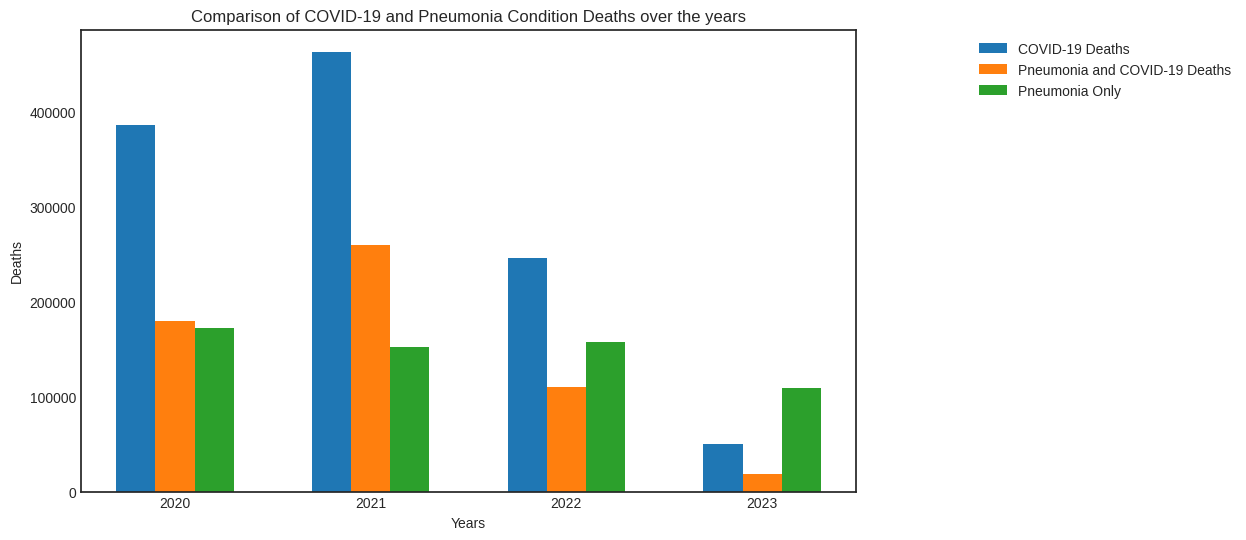

In [379]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

# Defining the data and labels
year_labels = ['2020','2021','2022','2023']
pneumonia_and_covid_deaths = Covid_Pneumonia_deaths ['Pneumonia and COVID-19 Deaths']
covid_deaths = Covid_Pneumonia_deaths ['COVID-19 Deaths']
pneumonia_only_deaths = Covid_Pneumonia_deaths ['Pneumonia Only']

x = Covid_Pneumonia_deaths['Year']
bar_width = 0.2
fig, ax = plt.subplots(figsize=(10, 6))

# Creating three sets of bar plots for COVID-19 Deaths, Pneumonia and COVID-19 Deaths, and Pneumonia Only
plt.bar([i - 1 * bar_width for i in x], covid_deaths, width=bar_width, label='COVID-19 Deaths')
plt.bar(x, pneumonia_and_covid_deaths , width=bar_width, label='Pneumonia and COVID-19 Deaths')
plt.bar([i + 1 * bar_width for i in x], pneumonia_only_deaths, width=bar_width, label='Pneumonia Only')

# Setiing labels and title for the plot
ax.set_xlabel('Years')
ax.set_xticks(x)
ax.set_xticklabels(year_labels)
ax.set_ylabel('Deaths')
ax.set_title('Comparison of COVID-19 and Pneumonia Condition Deaths over the years')

ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

##### Summary:
The graph shows us that during 2020 and 2021, deaths due to COVID-19 increased and the same case was true for deaths due to both pneumonia and COVID-19. After that, the trend decreased for both the graphs. The deaths due to only pneumonia stayed constant though, which showed that this is endemic to the United States, whereas COVID-19 is slowly fading due to better health and safety conditions.


During initital year of Covid, more than half of the population who had Pneumonia condition did not survive when came they came into contact with COVID-19. This increased rapidly and we can see that there was a severe impact of COVID-19 on people that had pneumonia during 2021 as well.

After that, however, there was a notable change in 2022. Population who passed away due to both pneumonia and covid dropped to less than half of the deaths due to pneumonia only.This trend continued in 2023 and the percentage has dropped to less than 25%. By this, we can see that the vaccinatins and improved healthcare measures have mitigated the impact of covid on pneumonia condition population over the years.


 ## Question 6: What is the impact of COVID-19 on pneumonia patients for Men and Women?


#### Line Chart to analyze the impact of COVID-19 on Female and Male population that died from Pneumonia.


In [380]:
#Adding Pneumonua and Covid-19 Death Ratio to the dataset
deaths['Pneumonia and COVID-19 Death Ratio'] = deaths['Pneumonia and COVID-19 Deaths'] / deaths['COVID-19 Deaths']
deaths

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Pneumonia Only,Only Covid19 Deaths,Pneumonia and COVID-19 Death Ratio
0,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,All Ages,1145443,12243921,1159433,568733,22198,1755856,590700,576710,0.496518
2,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,0-17 years,1695,130217,2948,424,509,4702,2524,1271,0.250147
6,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,18-29 years,7025,230187,7020,3160,328,11184,3860,3865,0.449822
8,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,30-39 years,19870,346229,18346,9761,643,29053,8585,10109,0.491243
10,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,40-49 years,46234,508822,41012,24063,999,64057,16949,22171,0.520461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137693,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,40-49 years,0,0,0,0,0,0,0,0,NaN
137695,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,50-64 years,0,44,0,0,0,0,0,0,NaN
137697,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,65-74 years,0,58,0,0,0,0,0,0,NaN
137698,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,75-84 years,0,115,22,0,0,24,22,0,NaN


In [381]:
# Fill the missing values
fill_values = {'Pneumonia and COVID-19 Death Ratio': 0}
deaths.fillna(fill_values, inplace=True)
deaths

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Pneumonia Only,Only Covid19 Deaths,Pneumonia and COVID-19 Death Ratio
0,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,All Ages,1145443,12243921,1159433,568733,22198,1755856,590700,576710,0.496518
2,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,0-17 years,1695,130217,2948,424,509,4702,2524,1271,0.250147
6,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,18-29 years,7025,230187,7020,3160,328,11184,3860,3865,0.449822
8,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,30-39 years,19870,346229,18346,9761,643,29053,8585,10109,0.491243
10,9/20/23,1/1/20,9/16/23,By Total,NaN,NaN,United States,All Sexes,40-49 years,46234,508822,41012,24063,999,64057,16949,22171,0.520461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137693,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,40-49 years,0,0,0,0,0,0,0,0,0.000000
137695,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,50-64 years,0,44,0,0,0,0,0,0,0.000000
137697,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,65-74 years,0,58,0,0,0,0,0,0,0.000000
137698,9/20/23,9/1/23,9/16/23,By Month,2023.0,9.0,Puerto Rico,Female,75-84 years,0,115,22,0,0,24,22,0,0.000000


In [382]:
# Constructing and Filtering a DataFrame that exclusively includes the data required for the graph
Pneumonia_COVID_Death_Ratio= deaths.loc[(deaths['Group']== 'By Month') & (deaths['State']== 'United States') & (deaths['Sex'] != 'All Sexes') & (deaths['Age Group'] == 'All Ages')].reset_index(drop=True)
Pneumonia_COVID_Death_Ratio['Year'] = Pneumonia_COVID_Death_Ratio ["Year"].astype(int)
Pneumonia_COVID_Death_Ratio

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Pneumonia Only,Only Covid19 Deaths,Pneumonia and COVID-19 Death Ratio
0,9/20/23,1/1/20,1/31/20,By Month,2020,1.0,United States,Male,All Ages,3,135944,9153,1,1052,10207,9152,2,0.333333
1,9/20/23,1/1/20,1/31/20,By Month,2020,1.0,United States,Female,All Ages,3,128733,8756,2,1073,9830,8754,1,0.666667
2,9/20/23,2/1/20,2/29/20,By Month,2020,2.0,United States,Male,All Ages,13,126121,8172,6,1179,9357,8166,7,0.461538
3,9/20/23,2/1/20,2/29/20,By Month,2020,2.0,United States,Female,All Ages,12,118830,7568,4,1194,8770,7564,8,0.333333
4,9/20/23,3/1/20,3/31/20,By Month,2020,3.0,United States,Male,All Ages,4379,140376,12104,2013,1237,15625,10091,2366,0.459694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,9/20/23,7/1/23,7/31/23,By Month,2023,7.0,United States,Female,All Ages,1089,114736,5682,371,50,6446,5311,718,0.340680
86,9/20/23,8/1/23,8/31/23,By Month,2023,8.0,United States,Male,All Ages,1915,119412,6554,790,46,7722,5764,1125,0.412533
87,9/20/23,8/1/23,8/31/23,By Month,2023,8.0,United States,Female,All Ages,1804,110509,5790,663,40,6965,5127,1141,0.367517
88,9/20/23,9/1/23,9/16/23,By Month,2023,9.0,United States,Male,All Ages,896,34707,2138,388,21,2664,1750,508,0.433036


In [383]:
# Constructing the DataFrame that exclusively includes the columns required for the graph
Pneumonia_COVID_Death_Ratio= Pneumonia_COVID_Death_Ratio[['Month','Year','Sex','Pneumonia and COVID-19 Death Ratio']]
Pneumonia_COVID_Death_Ratio

,Month,Year,Sex,Pneumonia and COVID-19 Death Ratio
0,1.0,2020,Male,0.333333
1,1.0,2020,Female,0.666667
2,2.0,2020,Male,0.461538
3,2.0,2020,Female,0.333333
4,3.0,2020,Male,0.459694
...,...,...,...,...
85,7.0,2023,Female,0.340680
86,8.0,2023,Male,0.412533
87,8.0,2023,Female,0.367517
88,9.0,2023,Male,0.433036


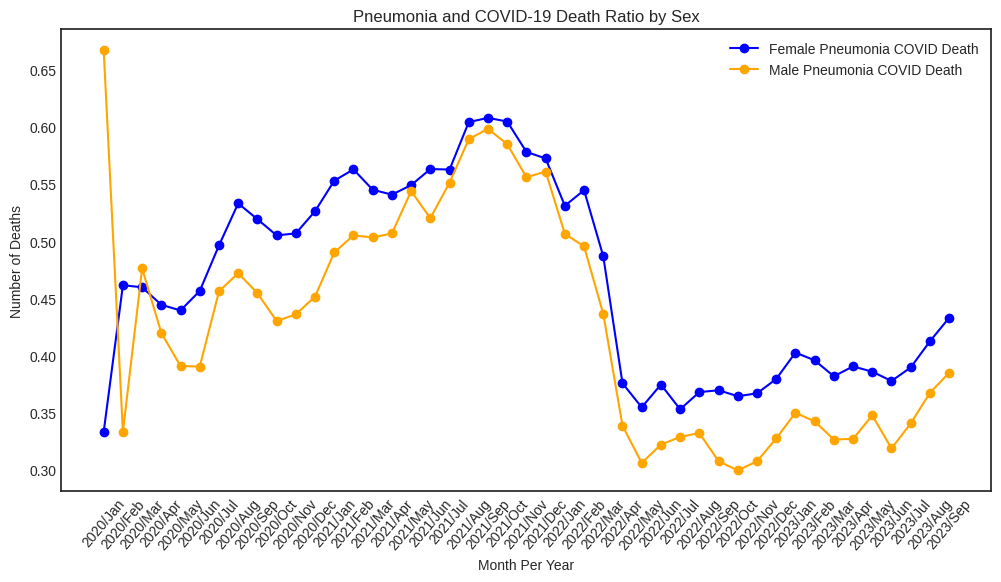

In [384]:
# Filtering data for Male and Female from the Pneumonia_COVID_Death_Ratio dataset
Male_Pneumonia_COVID_Death_Ratio =Pneumonia_COVID_Death_Ratio.loc[Pneumonia_COVID_Death_Ratio['Sex']=='Male']
Female_Pneumonia_COVID_Death_Ratio =Pneumonia_COVID_Death_Ratio.loc[Pneumonia_COVID_Death_Ratio['Sex']=='Female']

plt.figure(figsize=(12, 6))
ax = plt.axes()

# Creating labels for x-axis
years = ['2020','2021','2022','2023']
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
lst = []

for i in range(len(years)):
  for j in range(len(month_labels)):
    lst.append(years[i]+'/'+month_labels[j])

new_lst = lst[:-3]

# Creating a line chart for Male and Female Pneumonia_COVID_Death_Ratio
ax.plot(range(45),Male_Pneumonia_COVID_Death_Ratio['Pneumonia and COVID-19 Death Ratio'],'blue',label='Female Pneumonia COVID Death',marker='o')
ax.plot(range(45),Female_Pneumonia_COVID_Death_Ratio['Pneumonia and COVID-19 Death Ratio'],'orange',label='Male Pneumonia COVID Death',marker='o')

ax.set_xticks(range(45))
ax.set_xticklabels(new_lst,rotation=50)
ax.set_title('Pneumonia and COVID-19 Death Ratio by Sex')
ax.set_xlabel('Month Per Year')
ax.set_ylabel('Number of Deaths')

ax.legend()
plt.show()

##### Summary:
The above graph represents the Pneumonia and covid death ratio by Gender. This is done by comparing the pneumonia and covid death against the covid death.There is a notable gender difference in the impact of pneumonia when combined with COVID-19. We could see that the female population who had pneumonia when came in contact with covid had a more adverse effect than the male population. This could be due to variations in gender immunity responses.

In 2020 Jan, there was only one male who had pneumonia and has been effected by covid, hence the line starts from the top most for this.


## Question 7: What is the impact of COVID-19 on pneumonia patients for different age groups?


#### Line Chart to analyze the impact of COVID-19 for different age groups that died from Pneumonia.


In [385]:
# Constructing and Filtering a DataFrame that exclusively includes the data required for the graph
Pneumonia_COVID_Death_Ratio_Age= deaths.loc[(deaths['Group']== 'By Month') & (deaths['State']== 'United States') & (deaths['Sex'] == 'All Sexes') & (deaths['Age Group'] != 'All Ages')].reset_index(drop=True)
Pneumonia_COVID_Death_Ratio_Age['Year'] = Pneumonia_COVID_Death_Ratio_Age ["Year"].astype(int)
Pneumonia_COVID_Death_Ratio_Age

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Pneumonia Only,Only Covid19 Deaths,Pneumonia and COVID-19 Death Ratio
0,9/20/23,1/1/20,1/31/20,By Month,2020,1.0,United States,All Sexes,0-17 years,0,2966,90,0,63,153,90,0,0.000000
1,9/20/23,1/1/20,1/31/20,By Month,2020,1.0,United States,All Sexes,18-29 years,0,4426,114,0,54,168,114,0,0.000000
2,9/20/23,1/1/20,1/31/20,By Month,2020,1.0,United States,All Sexes,30-39 years,0,6475,246,0,112,358,246,0,0.000000
3,9/20/23,1/1/20,1/31/20,By Month,2020,1.0,United States,All Sexes,40-49 years,0,9792,485,0,151,636,485,0,0.000000
4,9/20/23,1/1/20,1/31/20,By Month,2020,1.0,United States,All Sexes,50-64 years,2,43009,2572,0,523,3097,2572,2,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,9/20/23,9/1/23,9/16/23,By Month,2023,9.0,United States,All Sexes,40-49 years,12,2030,56,2,3,68,54,10,0.166667
356,9/20/23,9/1/23,9/16/23,By Month,2023,9.0,United States,All Sexes,50-64 years,112,9355,446,48,4,514,398,64,0.428571
357,9/20/23,9/1/23,9/16/23,By Month,2023,9.0,United States,All Sexes,65-74 years,289,13829,890,134,6,1051,756,155,0.463668
358,9/20/23,9/1/23,9/16/23,By Month,2023,9.0,United States,All Sexes,75-84 years,585,19237,1271,246,15,1622,1025,339,0.420513


In [386]:
# Constructing the DataFrame that exclusively includes the columns required for the graph
Pneumonia_COVID_Death_Ratio_Age= Pneumonia_COVID_Death_Ratio_Age[['Month','Year','Age Group','Pneumonia and COVID-19 Death Ratio']]
Pneumonia_COVID_Death_Ratio_Age

,Month,Year,Age Group,Pneumonia and COVID-19 Death Ratio
0,1.0,2020,0-17 years,0.000000
1,1.0,2020,18-29 years,0.000000
2,1.0,2020,30-39 years,0.000000
3,1.0,2020,40-49 years,0.000000
4,1.0,2020,50-64 years,0.000000
...,...,...,...,...
355,9.0,2023,40-49 years,0.166667
356,9.0,2023,50-64 years,0.428571
357,9.0,2023,65-74 years,0.463668
358,9.0,2023,75-84 years,0.420513


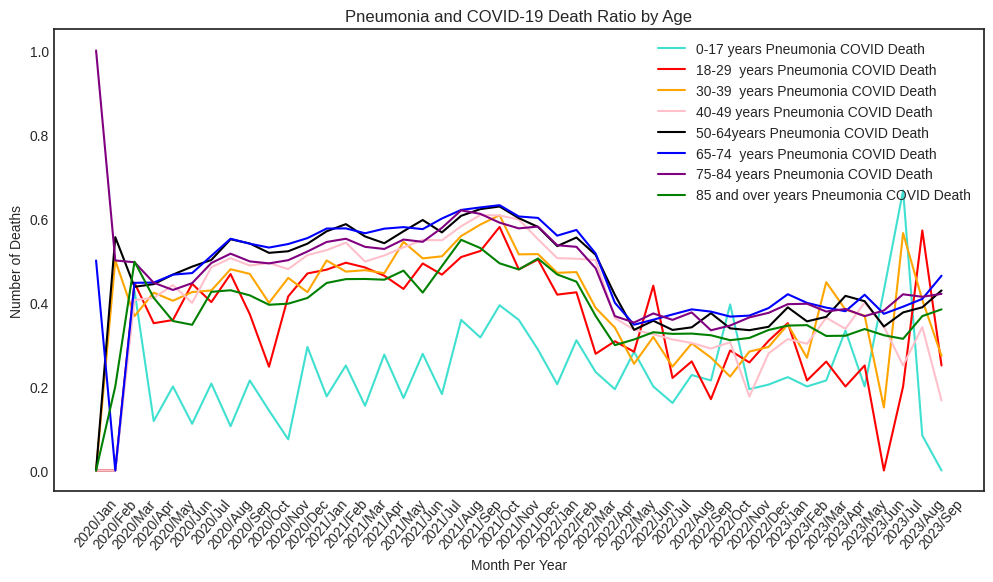

In [387]:
# Filtering data for Differnt Age groups from the Pneumonia_COVID_Death_Ratio dataset
Age_0_17_years_Pneumonia_COVID_Death_Ratio_Age =Pneumonia_COVID_Death_Ratio_Age.loc[Pneumonia_COVID_Death_Ratio_Age['Age Group']=='0-17 years']
Age_18_29_years_Pneumonia_COVID_Death_Ratio_Age =Pneumonia_COVID_Death_Ratio_Age.loc[Pneumonia_COVID_Death_Ratio_Age['Age Group']=='18-29 years']
Age_30_39_years_Pneumonia_COVID_Death_Ratio_Age =Pneumonia_COVID_Death_Ratio_Age.loc[Pneumonia_COVID_Death_Ratio_Age['Age Group']=='30-39 years']
Age_40_49_years_Pneumonia_COVID_Death_Ratio_Age =Pneumonia_COVID_Death_Ratio_Age.loc[Pneumonia_COVID_Death_Ratio_Age['Age Group']=='40-49 years']
Age_50_64_years_Pneumonia_COVID_Death_Ratio_Age =Pneumonia_COVID_Death_Ratio_Age.loc[Pneumonia_COVID_Death_Ratio_Age['Age Group']=='50-64 years']
Age_65_74_years_Pneumonia_COVID_Death_Ratio_Age =Pneumonia_COVID_Death_Ratio_Age.loc[Pneumonia_COVID_Death_Ratio_Age['Age Group']=='65-74 years']
Age_75_84_years_Pneumonia_COVID_Death_Ratio_Age =Pneumonia_COVID_Death_Ratio_Age.loc[Pneumonia_COVID_Death_Ratio_Age['Age Group']=='75-84 years']
Age_85_above_years_Pneumonia_COVID_Death_Ratio_Age =Pneumonia_COVID_Death_Ratio_Age.loc[Pneumonia_COVID_Death_Ratio_Age['Age Group']=='85 years and over']

plt.figure(figsize=(12, 6))
ax = plt.axes()

# Creating labels for x-axis
years = ['2020','2021','2022','2023']
month_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
lst = []

for i in range(len(years)):
  for j in range(len(month_labels)):
    lst.append(years[i]+'/'+month_labels[j])

new_lst = lst[:-3]

# Creating a line chart for Differnt Age groups Pneumonia_COVID_Death_Ratio
ax.plot(range(45),Age_0_17_years_Pneumonia_COVID_Death_Ratio_Age['Pneumonia and COVID-19 Death Ratio'],'turquoise',label='0-17 years Pneumonia COVID Death')
ax.plot(range(45),Age_18_29_years_Pneumonia_COVID_Death_Ratio_Age['Pneumonia and COVID-19 Death Ratio'],'red',label='18-29  years Pneumonia COVID Death')
ax.plot(range(45),Age_30_39_years_Pneumonia_COVID_Death_Ratio_Age['Pneumonia and COVID-19 Death Ratio'],'orange',label='30-39  years Pneumonia COVID Death')
ax.plot(range(45),Age_40_49_years_Pneumonia_COVID_Death_Ratio_Age['Pneumonia and COVID-19 Death Ratio'],'pink',label='40-49 years Pneumonia COVID Death')
ax.plot(range(45),Age_50_64_years_Pneumonia_COVID_Death_Ratio_Age['Pneumonia and COVID-19 Death Ratio'],'black',label='50-64years Pneumonia COVID Death')
ax.plot(range(45),Age_65_74_years_Pneumonia_COVID_Death_Ratio_Age['Pneumonia and COVID-19 Death Ratio'],'blue',label='65-74  years Pneumonia COVID Death')
ax.plot(range(45),Age_75_84_years_Pneumonia_COVID_Death_Ratio_Age['Pneumonia and COVID-19 Death Ratio'],'purple',label='75-84 years Pneumonia COVID Death')
ax.plot(range(45),Age_85_above_years_Pneumonia_COVID_Death_Ratio_Age['Pneumonia and COVID-19 Death Ratio'],'green',label='85 and over years Pneumonia COVID Death')


ax.set_xticks(range(45))
ax.set_xticklabels(new_lst,rotation=50)
ax.set_title('Pneumonia and COVID-19 Death Ratio by Age')
ax.set_xlabel('Month Per Year')
ax.set_ylabel('Number of Deaths')

ax.legend()
plt.show()


##### Summary:
The above graph represents the Pneumonia and covid death ratio by Age Groups. This is done by comparing Pneumonia and COVID-19 deaths against COVID-19 death.
The findings indicate that the age group 0-17, with a pre-existing pneumonia condition, experienced the least severe effects of COVID-19. However, the age group 65-74 was the most severely affected.

For the age group ranging from 50-84, the impact of COVID-19 in the presence of pneumonia appeared to be fairly constant. The age group ranging from 18- 49 showed similar patterns.

These observations suggest that age plays a significant role in determining the severity of COVID-19 outcomes when pneumonia is a contributing factor. Age is directly proportional to the impact of COVID-19 in the presence of pneumonia. However, it is not the same for the age group 85 and over.


## Question 8: What is the COVID-19 death count for each state for each year?


#### Bar chart for states most affected by COVID-19

In [420]:
filtered_data = deaths[(deaths['Group']=='By Total') & (deaths['State'] != 'United States') &
 (deaths['Sex']=='All Sexes') & (deaths['Age Group']=='All Ages')]

top_states = filtered_data.groupby('State')['COVID-19 Deaths'].sum().sort_values(ascending=False)
top_10_states = top_states.iloc[0:10]
top_df = top_10_states.to_frame(name='COVID-19 Deaths').reset_index()
numbers = top_df['COVID-19 Deaths']
states = top_df['State']

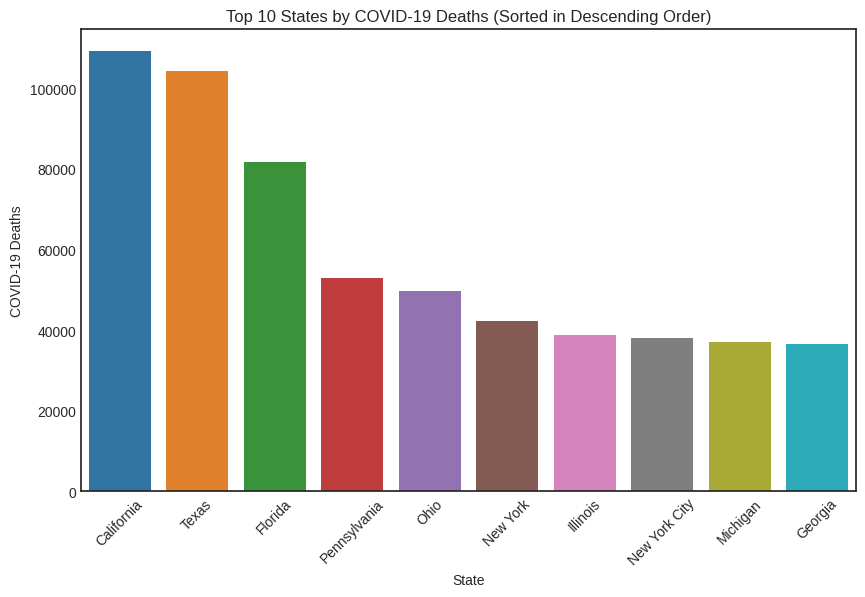

In [421]:
plt.figure(figsize=(10, 6))
sns.barplot(x=states, y=numbers)
plt.title("Top 10 States by COVID-19 Deaths (Sorted in Descending Order)")
plt.xlabel("State")
plt.ylabel("COVID-19 Deaths")
plt.xticks(rotation=45)
plt.show()

##### Summary:
This graph shows the top 10 states with the most COVID-19 deaths. California has the highest death count with over 140000 deaths, and is closely followed by Texas and Florida with 100000+ deaths and 80000+ deaths respectively.
It's clear that these places have been hit hard by the pandemic, and it gives a snapshot of where the biggest impacts have been in terms of fatalities.

#### Geo-plot for COVID-19 deaths for United States and its regions for each year

In [389]:
!pip install plotly_express -q
import plotly_express as px

In [390]:
map=deaths[['Group','Year','State','COVID-19 Deaths','Sex','Age Group']]

map.head()

,Group,Year,State,COVID-19 Deaths,Sex,Age Group
0,By Total,NaN,United States,1145443,All Sexes,All Ages
2,By Total,NaN,United States,1695,All Sexes,0-17 years
6,By Total,NaN,United States,7025,All Sexes,18-29 years
8,By Total,NaN,United States,19870,All Sexes,30-39 years
10,By Total,NaN,United States,46234,All Sexes,40-49 years


In [391]:
map=map.loc[(map['Group']== 'By Year') & (map['Sex'] == 'All Sexes') & (map['Age Group'] == 'All Ages') & (map['State'] != 'United States' ) & (map['State'] != 'Puerto Rico' )].reset_index(drop=True)
map['Year'] = map["Year"].astype(int)
map

,Group,Year,State,COVID-19 Deaths,Sex,Age Group
0,By Year,2020,Alabama,6706,All Sexes,All Ages
1,By Year,2021,Alabama,9719,All Sexes,All Ages
2,By Year,2022,Alabama,4226,All Sexes,All Ages
3,By Year,2023,Alabama,853,All Sexes,All Ages
4,By Year,2020,Alaska,254,All Sexes,All Ages
...,...,...,...,...,...,...
203,By Year,2023,Wisconsin,783,All Sexes,All Ages
204,By Year,2020,Wyoming,461,All Sexes,All Ages
205,By Year,2021,Wyoming,963,All Sexes,All Ages
206,By Year,2022,Wyoming,353,All Sexes,All Ages


In [392]:
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

State Codes were taken from this website:
https://medium.com/geekculture/create-a-choropleth-map-of-state-unemployment-rates-with-plotly-1354050e0cfd

In [393]:
map['Code']=map['State'].map(code)

In [394]:
map['COVID-19 Deaths'].max()

48787

In [395]:
fig = px.choropleth(map, locations="Code", locationmode='USA-states',color="COVID-19 Deaths", animation_frame="Year",hover_name="State",range_color=[0,50000],color_continuous_scale=
                    'spectral_r',scope='usa')
fig.update_layout(
    title= {'text':'Death of COVID-19 in each year in US States and DC(District of Columbia)',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})

fig.show()

# Use title as 50 states plus DC


https://plotly.github.io/plotly.py-docs/generated/plotly.express.choropleth.html
https://medium.com/geekculture/create-a-choropleth-map-of-state-unemployment-rates-with-plotly-1354050e0cfd


##### Summary:
Deaths due to COVID-19 in each year in US States and DC (District of Columbia): We plot a map to make a comparison about the death of COVID-19 in each year from 2020 to 2023 in each state. From the picture we can observe that in each year, Texas, California and Florida have much more deaths than other states. Among these four years, 2021 has the most deaths for almost all states. The states on the seaward sides have more deaths than the middle most times in general.

#### Geo-plot of Death Rate of each US state for each year

In [396]:
data_path_pop='/content/gdrive/MyDrive/BU-Fall/BA780-Project/2020-2022_population.csv'
population=pd.read_csv(data_path_pop)

population=population[['NAME','POPESTIMATE2020','POPESTIMATE2021','POPESTIMATE2022']]
population=population.rename(columns={'POPESTIMATE2020':'2020','POPESTIMATE2021':'2021','POPESTIMATE2022':'2022'})
population.head()

,NAME,2020,2021,2022
0,United States,331511512,332031554,333287557
1,Northeast Region,57448898,57259257,57040406
2,New England,15074473,15121745,15129548
3,Middle Atlantic,42374425,42137512,41910858
4,Midwest Region,68961043,68836505,68787595


In [397]:
map2=deaths[['Group','Year','State','COVID-19 Deaths','Sex','Age Group']]
map2

,Group,Year,State,COVID-19 Deaths,Sex,Age Group
0,By Total,NaN,United States,1145443,All Sexes,All Ages
2,By Total,NaN,United States,1695,All Sexes,0-17 years
6,By Total,NaN,United States,7025,All Sexes,18-29 years
8,By Total,NaN,United States,19870,All Sexes,30-39 years
10,By Total,NaN,United States,46234,All Sexes,40-49 years
...,...,...,...,...,...,...
137693,By Month,2023.0,Puerto Rico,0,Female,40-49 years
137695,By Month,2023.0,Puerto Rico,0,Female,50-64 years
137697,By Month,2023.0,Puerto Rico,0,Female,65-74 years
137698,By Month,2023.0,Puerto Rico,0,Female,75-84 years


In [398]:
map2=map2.loc[(map2['Group']== 'By Year') & (map2['Sex'] == 'All Sexes') & (map2['Age Group'] == 'All Ages') & (map2['State'] != 'United States' ) & (map2['State'] != 'Puerto Rico' )].reset_index(drop=True)
map2['Year'] = map2["Year"].astype(int)
map2

,Group,Year,State,COVID-19 Deaths,Sex,Age Group
0,By Year,2020,Alabama,6706,All Sexes,All Ages
1,By Year,2021,Alabama,9719,All Sexes,All Ages
2,By Year,2022,Alabama,4226,All Sexes,All Ages
3,By Year,2023,Alabama,853,All Sexes,All Ages
4,By Year,2020,Alaska,254,All Sexes,All Ages
...,...,...,...,...,...,...
203,By Year,2023,Wisconsin,783,All Sexes,All Ages
204,By Year,2020,Wyoming,461,All Sexes,All Ages
205,By Year,2021,Wyoming,963,All Sexes,All Ages
206,By Year,2022,Wyoming,353,All Sexes,All Ages


In [399]:
population_2=population.set_index(['NAME'])
population_2=population_2.unstack()
population_2=population_2.reset_index()
population_2.columns=['Year', 'State','Population']
population_2

,Year,State,Population
0,2020,United States,331511512
1,2020,Northeast Region,57448898
2,2020,New England,15074473
3,2020,Middle Atlantic,42374425
4,2020,Midwest Region,68961043
...,...,...,...
193,2022,Washington,7785786
194,2022,West Virginia,1775156
195,2022,Wisconsin,5892539
196,2022,Wyoming,581381


In [400]:
duplicate = population_2[population_2.duplicated()]
duplicate

,Year,State,Population


In [401]:
population_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        198 non-null    object
 1   State       198 non-null    object
 2   Population  198 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [402]:
map2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Group            208 non-null    object
 1   Year             208 non-null    int64 
 2   State            208 non-null    object
 3   COVID-19 Deaths  208 non-null    int64 
 4   Sex              208 non-null    object
 5   Age Group        208 non-null    object
dtypes: int64(2), object(4)
memory usage: 9.9+ KB


In [403]:
population_2['Year']=population_2['Year'].astype('int')

In [404]:
map_2=pd.merge(map2,population_2,on=['State','Year'],how='inner')
map_2

,Group,Year,State,COVID-19 Deaths,Sex,Age Group,Population
0,By Year,2020,Alabama,6706,All Sexes,All Ages,5031362
1,By Year,2021,Alabama,9719,All Sexes,All Ages,5049846
2,By Year,2022,Alabama,4226,All Sexes,All Ages,5074296
3,By Year,2020,Alaska,254,All Sexes,All Ages,732923
4,By Year,2021,Alaska,839,All Sexes,All Ages,734182
...,...,...,...,...,...,...,...
148,By Year,2021,Wisconsin,6076,All Sexes,All Ages,5880101
149,By Year,2022,Wisconsin,3912,All Sexes,All Ages,5892539
150,By Year,2020,Wyoming,461,All Sexes,All Ages,577605
151,By Year,2021,Wyoming,963,All Sexes,All Ages,579483


In [405]:
map_2['Death_rate']=map_2['COVID-19 Deaths']/map_2['Population']
map_2.head()

,Group,Year,State,COVID-19 Deaths,Sex,Age Group,Population,Death_rate
0,By Year,2020,Alabama,6706,All Sexes,All Ages,5031362,0.001333
1,By Year,2021,Alabama,9719,All Sexes,All Ages,5049846,0.001925
2,By Year,2022,Alabama,4226,All Sexes,All Ages,5074296,0.000833
3,By Year,2020,Alaska,254,All Sexes,All Ages,732923,0.000347
4,By Year,2021,Alaska,839,All Sexes,All Ages,734182,0.001143


In [406]:
map_2['Code']=map_2['State'].map(code)

In [407]:
map_2['Death_rate'].max()

0.0022055125492431923

In [408]:
fig = px.choropleth(map_2, locations="Code", locationmode='USA-states',color="Death_rate", animation_frame="Year",hover_name="State",range_color=[0,0.0025],color_continuous_scale=
                    'spectral_r',scope='usa')
fig.update_layout(
    title= {'text':'Death Rate of COVID-19 in each year in US States and DC(District of Columbia)',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})

fig.show()


##### Summary
Deaths Rate of COVID-19 in each year in US States and DC (District of Columbia): We plot a map to make a comparison about the death rate of COVID-19 in each year from 2020 to 2023 in each state. From the picture we can observe that the distribution is different from the previous deaths map. States that have the highest death rates are not the states that have the highest absolute death number. The death rate distributions are different in each year. In 2020, New Jersey has the highest death rate; in 2021 and 2022, West Virginia has the highest death rate.

## Question 9: What is the Pneumonia death count for each state per year?

#### Geo-plot for Pneumonia Deaths for each US state for each year


In [409]:
map3=deaths[['Group','Year','State','Pneumonia Deaths','Sex','Age Group']]
map3.head()

,Group,Year,State,Pneumonia Deaths,Sex,Age Group
0,By Total,NaN,United States,1159433,All Sexes,All Ages
2,By Total,NaN,United States,2948,All Sexes,0-17 years
6,By Total,NaN,United States,7020,All Sexes,18-29 years
8,By Total,NaN,United States,18346,All Sexes,30-39 years
10,By Total,NaN,United States,41012,All Sexes,40-49 years


In [410]:
map3=map3.loc[(map3['Group']== 'By Year') & (map3['Sex'] == 'All Sexes') & (map3['Age Group'] == 'All Ages') & (map3['State'] != 'United States' ) & (map3['State'] != 'Puerto Rico' )].reset_index(drop=True)
map3['Year'] = map3["Year"].astype(int)
map3

,Group,Year,State,Pneumonia Deaths,Sex,Age Group
0,By Year,2020,Alabama,5213,All Sexes,All Ages
1,By Year,2021,Alabama,6356,All Sexes,All Ages
2,By Year,2022,Alabama,3935,All Sexes,All Ages
3,By Year,2023,Alabama,2061,All Sexes,All Ages
4,By Year,2020,Alaska,312,All Sexes,All Ages
...,...,...,...,...,...,...
203,By Year,2023,Wisconsin,1792,All Sexes,All Ages
204,By Year,2020,Wyoming,475,All Sexes,All Ages
205,By Year,2021,Wyoming,808,All Sexes,All Ages
206,By Year,2022,Wyoming,380,All Sexes,All Ages


In [411]:
map3['Code']=map3['State'].map(code)

In [412]:
map3['Pneumonia Deaths'].max()

45889

In [413]:
fig = px.choropleth(map3, locations="Code", locationmode='USA-states',color="Pneumonia Deaths", animation_frame="Year",hover_name="State",range_color=[0,50000],color_continuous_scale=
                    'spectral_r',scope='usa')
fig.update_layout(
    title= {'text':'Death of Pneumonia in each year in US States and DC(District of Columbia)',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})

fig.show()

# Use title as 50 states plus DC

##### Summary:
Deaths of Pneumonia in each year in US States and DC (District of Columbia): We plot a map to make a comparison about the death of Pneumonia in each year from 2020 to 2023 in each state. From the picture we can observe that in each year, Texas, California and Florida have much more deaths than other states. Among these four years, 2021 has the most deaths for all states. The states on the seaward sides have more deaths than the middle most times in general. Compared with the map of deaths of COVID-19, we can observe that they have the simialr distribution among states.

## Question 10: What is the Influenza death count for each state per year?

#### Geo-plot for Pneumonia Deaths for each US state for each year


In [414]:
map4=deaths[['Group','Year','State','Influenza Deaths','Sex','Age Group']]
map4.head()

,Group,Year,State,Influenza Deaths,Sex,Age Group
0,By Total,NaN,United States,22198,All Sexes,All Ages
2,By Total,NaN,United States,509,All Sexes,0-17 years
6,By Total,NaN,United States,328,All Sexes,18-29 years
8,By Total,NaN,United States,643,All Sexes,30-39 years
10,By Total,NaN,United States,999,All Sexes,40-49 years


In [415]:
map4=map4.loc[(map4['Group']== 'By Year') & (map4['Sex'] == 'All Sexes') & (map4['Age Group'] == 'All Ages') & (map4['State'] != 'United States' ) & (map4['State'] != 'Puerto Rico' )].reset_index(drop=True)
map4['Year'] = map4["Year"].astype(int)
map4

,Group,Year,State,Influenza Deaths,Sex,Age Group
0,By Year,2020,Alabama,140,All Sexes,All Ages
1,By Year,2021,Alabama,36,All Sexes,All Ages
2,By Year,2022,Alabama,132,All Sexes,All Ages
3,By Year,2023,Alabama,47,All Sexes,All Ages
4,By Year,2020,Alaska,10,All Sexes,All Ages
...,...,...,...,...,...,...
203,By Year,2023,Wisconsin,89,All Sexes,All Ages
204,By Year,2020,Wyoming,10,All Sexes,All Ages
205,By Year,2021,Wyoming,0,All Sexes,All Ages
206,By Year,2022,Wyoming,17,All Sexes,All Ages


In [416]:
map4['Code']=map4['State'].map(code)

In [417]:
map4['Influenza Deaths'].max()

1021

In [418]:
fig = px.choropleth(map4, locations="Code", locationmode='USA-states',color="Influenza Deaths", animation_frame="Year",hover_name="State",range_color=[0,1200],color_continuous_scale=
                    'spectral_r',scope='usa')
fig.update_layout(
    title= {'text':'Death of Influenza in each year in US States and DC(District of Columbia)',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})

fig.show()

# Use title as 50 states plus DC

#####Summary:
Deaths of Influenza in each year in US States and DC (District of Columbia): We plot a map to make a comparison about the death of Influenza in each year from 2020 to 2023 in each state. From the picture we can observe that in each year, Texas, California have much more deaths than other states. Among these four years, 2020 and 2022 have significant more deaths than 2021 and 2023 for all states. Coastal states generally have more deaths than the middle regions. Compared with the map of deaths of COVID-19, we can observe that they have the similar patern.

# 3. Conclusions:
Our data and visualizations tell us about the general death trend with regards to sex, age group for every year since COVID-19's first case. Identifying insights from this data will greatly help the local authorities in trying to mitigate further deaths by concentrating their efforts towards certain regions and for particular age groups.

Our data shows us that COVID-19 deaths were at their highest towards the end of 2020 and start of 2021 and then they started to decline. There were roughly the same deaths for male and female.

Our data also shows us that the trend for COVID-19 deaths first increased and then decreased but the trend for influenza and pneumonia deaths remained constant. This tells us that COVID-19 is pandemic whereas Pneumonia and Influenza remain endemic to the region.  

Our data also showed us that old people were more susceptible of dying from COVID-19 than other age groups which is why they should be practicing social distancing more strictly. It is the same for pneumonia and influenza patients as well.

There were more deaths in California and Texas compared to other states which is why efforts for COVID-19 prevention should be concentrated in these regions.



# 4. References:
Center for Disease Control and Prevention. Link to access the data source is provided below. https://data.cdc.gov/NCHS/Provisional-COVID-19-Deaths-by-Sex-and-Age/9bhg-hcku

State Population Totals and Components of Change (2020-2022): https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html

